# Fixed Beam subjected to Point Loads
Consider a fixed beam subjected to point loads applied perpendicular to the span. The structure is statically indeterminate to second degree. However, our knowledge of fixed end moments, obtained from other methods such as strain energy or conjugate beam method give us the expressions to compute the fixed end moments $M_a$ and $M_b$ at the left and right supports respectively in a fixed beam of span $L$ due to a single point load $P_i$ applied at a distance $a_i$ from the left support as follows:.
$$
\begin{align*}
M_a &= \frac{1}{L^2} \sum P_i \, a_i \, (L - a_i)^2 \\
M_b &= \frac{1}{L^2} \sum P_i \, (L - a_i) \, a_i^2
\end{align*}$$

Knowing the fixed end moments at the two ends, we are left with only two unknown reactions, namely, $R_a$ and $R_b$ at the keft and right supports respectively. These can be determined by writing the two equations of static equilibrium, namely:
$$
\begin{align*}
\sum F_x &= R_a + R_b - \sum_{i=0}^{n-1} P_i = 0 \\
\sum M_a &= R_b \, L + M_a - M_b - \sum_{i=0}^{n-1} P_i \, a_i = 0
\end{align*}$$

These equations can be rearranged to obtain the reactions $R_a$ and $R_b$ as follows:
$$
\begin{align*}
R_b &= \frac{1}{L} \left( M_b - M_a + \sum_{i=0}^{n-1} P_i \, a_i \right) \\
R_a &= \sum_{i=0}^{n-1} P_i - R_b 
\end{align*}$$

In the above expressions, $n$ is the number of applied point loads.

Span = 10.0
Loads = [ 50.  75.  40.]
Distance of loads = [ 2.  5.  6.]
Number of equal divisions = 1000
Number of sections = 1001

Reactions
Ra = 96.38 Ma = 196.15 Rb = 68.62 Mb = 167.35

           x (m)    SF (kN)   BM (kNm)
    0       0.00      96.38    -196.15
  100       1.00      96.38     -99.77
  200       2.00      96.38      -3.39
  300       3.00      46.38      42.99
  400       4.00      46.38      89.37
  500       5.00      46.38     135.75
  600       6.00     -28.62     107.13
  700       7.00     -68.62      38.51
  800       8.00     -68.62     -30.11
  900       9.00     -68.62     -98.73
 1000      10.00     -68.62    -167.35


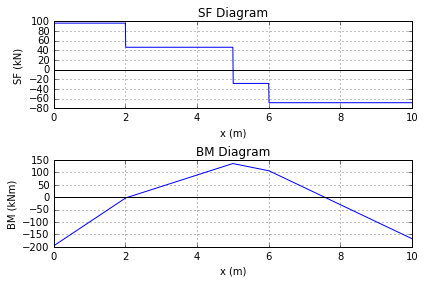

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Input Data
L = 10.0
P = np.array([50.0, 75.0, 40.0])
a = np.array([2.0, 5.0, 6.0])
ndiv = 1000
nprint = 100

# Echo of input
nsec = ndiv + 1 # Number of sections
print 'Span =', L
print 'Loads =', P
print 'Distance of loads =', a
print 'Number of equal divisions =', ndiv
print 'Number of sections =', nsec

# Reactions
sumP = 0.0
sumM = 0.0
Ma = 0.0
Mb = 0.0
nloads = P.size
for i in range(nloads):
    sumP += P[i]
    sumM += P[i] * a[i]
    Ma += P[i] * a[i] * (L - a[i])**2 / L**2
    Mb += P[i] * (L - a[i]) * a[i]**2 / L**2

Rb = (Mb - Ma + sumM) / L
Ra = sumP - Rb
print '\nReactions'
print 'Ra =', Ra, 'Ma =', Ma, 'Rb =', Rb, 'Mb =', Mb

# SF and BM
V = np.zeros(nsec, dtype=float) # SF
M = np.zeros_like(V)            # BM
x = np.linspace(0, L, nsec)     # Section distances

print
print "%5s %10s %10s %10s" % ('', 'x (m)', 'SF (kN)', 'BM (kNm)')
for j in range(nsec): # One section at a time
    V[j] = Ra
    M[j] = Ra * x[j] - Ma
    for i in range(nloads): # One load at a time
        if a[i] < x[j]: # Load to left of section
            V[j] -= P[i]
            M[j] -= P[i] * (x[j] - a[i])

    if j % nprint == 0:
        print "%5d %10.2f %10.2f %10.2f" % (j, x[j], V[j], M[j])

# Plot of SF and BM
plt.subplot(211)
plt.plot(x, V)
plt.grid()
plt.axhline(0.0, color='k')
plt.xlabel('x (m)')
plt.ylabel('SF (kN)')
plt.title('SF Diagram')
plt.subplot(212)
plt.plot(x, M)
plt.axhline(0.0, color='k')
plt.grid()
plt.xlabel('x (m)')
plt.ylabel('BM (kNm)')
plt.title('BM Diagram')
plt.tight_layout()
plt.savefig('sf_bm.png')
plt.show()

To play around with parameters, it would be best to modularise the program by converting the above program into functions that would do the following:

1. Function **`input()`** where we can define the input data
2. Function **`reactions`** to calculate support reactions
3. Function **`sf_bm()`** to calculate SF and BM at chosen sections
4. Function **`plot_sf_bm()`** to plot SF and BM diagram

Fixed Beam subjected to point Loads
Span = 10.00m
Magnitude of loads (kN): [ 50.  75.  40.]
Distance of loads from left support (m): [ 2.  5.  6.]
Number of equal divisions of span: 1000

Reactions
Ra = 96.38kN, Ma = 196.15kNm, Rb = 68.62kN, Mb = 167.35kNm

           x (m)    SF (kN)   BM (kNm)
    0       0.00      96.38    -196.15
  100       1.00      96.38     -99.77
  200       2.00      96.38      -3.39
  300       3.00      46.38      42.99
  400       4.00      46.38      89.37
  500       5.00      46.38     135.75
  600       6.00     -28.62     107.13
  700       7.00     -68.62      38.51
  800       8.00     -68.62     -30.11
  900       9.00     -68.62     -98.73
 1000      10.00     -68.62    -167.35


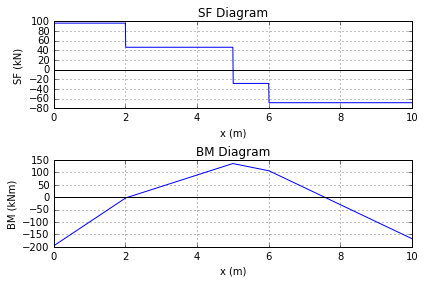

In [9]:
def input():
    L = 10.0
    P = np.array([50.0, 75.0, 40.0])
    a = np.array([2.0, 5.0, 6.0])
    ndiv = 1000
    nprint = 100
    print 'Fixed Beam subjected to point Loads'
    print 'Span = %.2fm' % L
    print 'Magnitude of loads (kN):', P
    print 'Distance of loads from left support (m):', a
    print 'Number of equal divisions of span:', ndiv
    return L, P, a, ndiv, nprint

def reactions(L, P, a):
    sumP = 0.0
    sumM = 0.0
    Ma = 0.0
    Mb = 0.0
    nloads = P.size
    for i in range(nloads):
        sumP += P[i]
        sumM += P[i] * a[i]
        Ma += P[i] * a[i] * (L - a[i])**2 / L**2
        Mb += P[i] * (L - a[i]) * a[i]**2 / L**2

    Rb = (Mb - Ma + sumM) / L
    Ra = sumP - Rb
    return Ra, Ma, Rb, Mb

def sf_bm(L, P, a, ndiv, nprint):
    V = np.zeros(nsec, dtype=float) # SF
    M = np.zeros_like(V)            # BM
    x = np.linspace(0, L, nsec)     # Section distances

    print
    print "%5s %10s %10s %10s" % ('', 'x (m)', 'SF (kN)', 'BM (kNm)')
    for j in range(nsec): # One section at a time
        V[j] = Ra
        M[j] = Ra * x[j] - Ma
        for i in range(nloads): # One load at a time
            if a[i] < x[j]: # Load to left of section
                V[j] -= P[i]
                M[j] -= P[i] * (x[j] - a[i])

        if j % nprint == 0:
            print "%5d %10.2f %10.2f %10.2f" % (j, x[j], V[j], M[j])
    return x, V, M

def plot_sf_bm(x, V, M):
    plt.subplot(211)
    plt.plot(x, V)
    plt.grid()
    plt.axhline(0.0, color='k')
    plt.xlabel('x (m)')
    plt.ylabel('SF (kN)')
    plt.title('SF Diagram')
    plt.subplot(212)
    plt.plot(x, M)
    plt.axhline(0.0, color='k')
    plt.grid()
    plt.xlabel('x (m)')
    plt.ylabel('BM (kNm)')
    plt.title('BM Diagram')
    plt.tight_layout()
    plt.savefig('sf_bm.png')
    plt.show()
    return

L, P, a, ndiv, nprint = input()
Ra, Ma, Rb, Mb = reactions(L, P, a)
print
print 'Reactions'
print 'Ra = %.2fkN, Ma = %.2fkNm, Rb = %.2fkN, Mb = %.2fkNm' % (Ra, Ma, Rb, Mb)

x, V, M = sf_bm(L, P, a, ndiv, nprint)
plot_sf_bm(x, V, M)